Prepared by Susan Li

2021-08-07

# American National Election Studies 2019

The data was downloaded from [American National Election Studies 2019 Pilot Study](https://electionstudies.org/data-center/2019-pilot-study/). The ANES 2019 Pilot Study was conducted for the purpose of testing new questions and conducting methodological research to provide public opinion data in December 2019.

In [676]:
pd.set_option('display.max_columns', 1000)
df = pd.read_csv('data/anes_pilot_2019.csv')

In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Columns: 900 entries, version to flag_state
dtypes: float64(223), int64(600), object(77)
memory usage: 21.7+ MB


## The Data

Cleaning up the data, that including rename columns, re-code category features, remove columns that will not be used, and so on.

In [678]:
mycols = ['caseid', 'liveurban', 'vote16', 'particip_3', 'vote20jb', 'mip', 'confecon', 'ideo5', 'pid7', 'guarinc', 'famsep', 
          'freecol', 'loans', 'race', 'birthyr', 'gender', 'educ', 'inputstate', 'weight']
ftcols = [x for x in df.columns if x.startswith('ft') and not x.endswith('timing') and not x.endswith('skp')]
df_clean = df[mycols + ftcols]

In [679]:
df_clean.drop('inputstate', axis=1, inplace=True)

df_clean.rename({'particip_3': 'protest', 
                 'vote20jb': 'vote', 
                 'mip': 'most_important_issue', 
                 'ideo5': 'ideology', 
                 'pid7': 'partyID', 
                 'guarinc': 'universal_income', 
                 'famsep': 'family_separation', 
                 'freecol': 'free_college', 
                 'loans': 'forgive_loans', 
                 'gender': 'sex', 
                 'educ': 'education'}, axis=1, inplace=True)

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [680]:
replace_map = {1: 'Donald Trump',
               2: 'Joe Biden', 
               3: 'Someone else',
               4: 'Probably will not vote'}
df_clean.vote = df_clean.vote.map(replace_map)

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [681]:
replace_map = {-7: np.nan,
               1: 'Liberal',
               2: 'Liberal',
               3: 'Moderate',
               4: 'Conservative', 
               5: 'Conservative',
               6: np.nan}
df_clean.ideology = df_clean.ideology.map(replace_map)

In [683]:
replace_map = {'liveurban': {1: 'Rural', 2: 'Town', 3: 'Suburb', 4: 'City'},
               'vote16': {-1: 'Did not vote', 1: 'Donald Trump', 2: 'Hillary Clinton', 3: 'Someone else'},
               'protest': {1: True, 2: False},
               'confecon': {1: 'Not at all worried', 2: 'A little worried', 3: 'Moderately worried', 
                            4: 'Very worried', 5: 'Extremely worried'},
               'partyID': {8: np.nan, 1: 'Democrat', 2: 'Democrat', 3: 'Democrat', 4: 'Independent', 5: 'Republican',
                           6: 'Republican', 7: 'Republican'},
               'universal_income': {1: 'Favor a great deal', 2: 'Favor a moderate amount', 3: 'Favor a little', 
                                    4: 'Neither favor nor oppose', 5: 'oppose a little', 6: 'Oppose a moderate amount',
                                    7: 'Oppse a great deal'},
               'family_separation': {-7: np.nan, 1: 'Favor strongly', 2: 'Favor somewhat', 3: 'Neither favor nor disagree',
                                     4: 'Oppose somewhat', 5: 'Oppose strongly'},
               'free_college': {-7: np.nan, 1: 'Favor a great deal', 2: 'Favor a moderate amount', 3: 'Favor a little',
                                4: 'Neither favor nor oppose', 5: 'Oppose a little', 6: 'Oppose a moderate amount', 
                                7: 'Oppose a great deal'},
               'forgive_loans': {-7: np.nan, 1: 'Favor a great deal', 2: 'Favor a moderate amount', 3: 'Favor a little', 
                                 4: 'Neither favor nor oppose', 5: 'Oppose a little', 6: 'Oppose a moderate amount', 
                                 7: 'Oppose a great deal'},
               'race': {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other', 5: 'Other', 6: 'Other', 7: 'Other', 8: 'Other'},
               'sex': {1: 'Male', 2: 'Female'},
               'education': {1: 'No HS diploma', 2: 'High school graduate', 3: 'Some college', 4: '2-year degree', 
                             5: '4-year degree', 6: 'Post-graduate'}}
df_clean = df_clean.replace(replace_map)       

In [684]:
ftcols = [x for x in df_clean.columns if x.startswith('ft')]
df_clean[ftcols] = df_clean[ftcols].replace([-1, -7, 997], np.nan)

In [686]:
df_clean['ftimmig'] = df_clean['ftimmig1']
df_clean.ftimmig[df_clean['ftimmig1'].isnull()] = df_clean.ftimmig2[df_clean['ftimmig1'].isnull()]
df_clean = df_clean.drop(['ftimmig1', 'ftimmig2'], axis=1)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Vote Choice

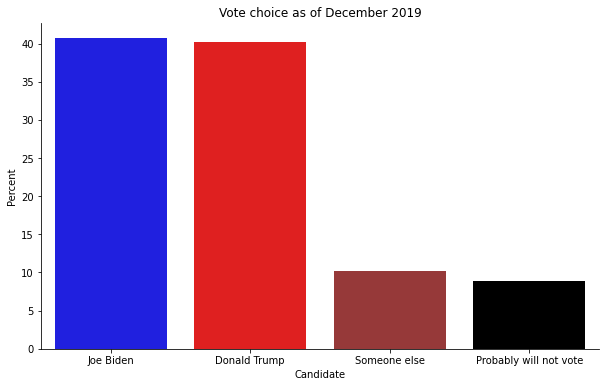

In [692]:
df_bar = df_clean.vote.value_counts().reset_index()
df_bar['pct'] = round(100*df_bar['vote'] / df_bar['vote'].sum(),2)

plt.figure(figsize=(10, 6))
myplot = sns.barplot(x='index', y='pct', data=df_bar, palette=['blue','red','brown','black'])
plt.xlabel('Candidate')
plt.ylabel('Percent')
plt.title('Vote choice as of December 2019')
sns.despine()
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()   
    plt.text(xcoor, ycoor, str(int(ycoor)),
             horizontalalignment = 'center', 
             verticalalignment = 'bottom',
             fontsize = 14, color = 'white');

According to the data, Donald Trump and Joe Biden were statistical tied as of December 2019.

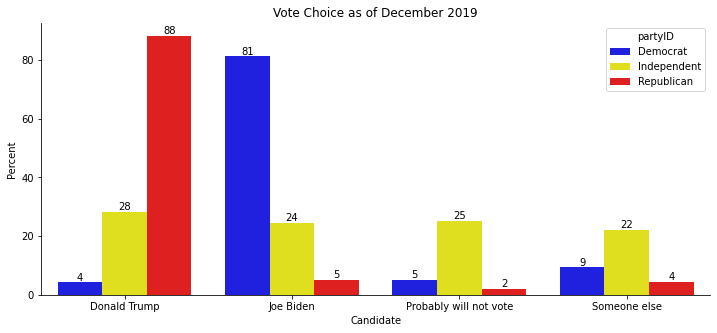

In [693]:
df_bar = df_clean.groupby(['partyID', 'vote']).size().reset_index().rename(columns = {0:'count'})
df_bar['sum'] = df_bar.groupby('partyID')['count'].transform('sum')
df_bar['pct'] = (df_bar['count'] / df_bar['sum'])*100

plt.figure(figsize=(12, 5))
myplot = sns.barplot(x='vote', y='pct', hue='partyID', data=df_bar, palette=['blue','yellow','red'])
plt.xlabel('Candidate')
plt.ylabel('Percent')
plt.title('Vote Choice as of December 2019')
sns.despine()
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)),
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10);

This is expected.

In [694]:
df_clean.query("vote=='Donald Trump' & fttrump < 5")

,caseid,liveurban,vote16,protest,vote,most_important_issue,confecon,ideology,partyID,universal_income,family_separation,free_college,forgive_loans,race,birthyr,sex,education,weight,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,fthisp,ftasian,ftmuslim,ftillegal,ftjournal,ftnato,ftun,ftice,ftnra,ftchina,ftnkorea,ftmexico,ftsaudi,ftukraine,ftiran,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales,ftimmig
678,679,Town,Someone else,False,Donald Trump,Poor health care need to take private for prof...,Moderately worried,NaN,Independent,Oppose a moderate amount,Oppose strongly,Favor a moderate amount,Favor a moderate amount,Other,1968,Male,No HS diploma,.836432294131514,2.0,49.0,0.0,2.0,3.0,68.0,0.0,98.0,99.0,99.0,100.0,67.0,8.0,98,1.0,0.0,100.0,99.0,1,1.0,99.0,2.0,49.0,0.0,98,53,99,1.0,97.0,98,15.0,2.0,6.0,46.0
3045,3046,Suburb,Someone else,True,Donald Trump,There are millions that are without healthcare...,Not at all worried,Liberal,Democrat,Favor a great deal,Oppose strongly,Favor a great deal,Favor a great deal,White,1978,Male,4-year degree,.608038345981773,1.0,1.0,0.0,0.0,100.0,0.0,0.0,86.0,75.0,85.0,74.0,78.0,88.0,52,0.0,2.0,0.0,0.0,3,0.0,83.0,0.0,15.0,2.0,80,96,68,1.0,65.0,90,20.0,60.0,99.0,88.0


These 2 people gave Trump thermometer rating < 5 but still voted for him. It looks like they dislike Biden even more.

In [695]:
df_clean.query("vote == 'Joe Biden'").query("ftbiden < 5")

,caseid,liveurban,vote16,protest,vote,most_important_issue,confecon,ideology,partyID,universal_income,family_separation,free_college,forgive_loans,race,birthyr,sex,education,weight,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,fthisp,ftasian,ftmuslim,ftillegal,ftjournal,ftnato,ftun,ftice,ftnra,ftchina,ftnkorea,ftmexico,ftsaudi,ftukraine,ftiran,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales,ftimmig
781,782,City,Someone else,False,Joe Biden,Crime high cost of renting gets higher ever ye...,A little worried,Conservative,Republican,Favor a little,Neither favor nor disagree,Oppose a little,Neither favor nor oppose,White,1955,Female,High school graduate,1.07978658850445,65.0,50.0,3.0,1.0,6.0,0.0,3.0,71.0,56.0,62.0,66.0,53.0,53.0,1,20.0,9.0,47.0,25.0,7,1.0,57.0,46.0,50.0,0.0,72,53,57,79.0,49.0,58,47.0,15.0,51.0,56.0
2061,2062,City,Hillary Clinton,False,Joe Biden,healthcare,A little worried,Moderate,Democrat,Neither favor nor oppose,Favor somewhat,Favor a great deal,Favor a moderate amount,White,1940,Female,No HS diploma,1.5074583391068,0.0,100.0,0.0,100.0,100.0,50.0,99.0,70.0,90.0,50.0,50.0,1.0,50.0,50,51.0,51.0,50.0,91.0,50,50.0,50.0,50.0,50.0,50.0,50,50,50,50.0,50.0,50,50.0,50.0,50.0,50.0
2321,2322,Suburb,Someone else,False,Joe Biden,Climate change,Moderately worried,Liberal,Democrat,Favor a great deal,Oppose strongly,Favor a great deal,Favor a great deal,White,1990,Male,2-year degree,1.72607310797372,0.0,70.0,1.0,90.0,90.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,60,50.0,50.0,0.0,0.0,5,0.0,50.0,0.0,50.0,50.0,50,50,50,5.0,50.0,50,50.0,5.0,50.0,50.0
2599,2600,Suburb,Did not vote,False,Joe Biden,capitalism,Very worried,Liberal,Democrat,Favor a moderate amount,Oppose strongly,Favor a great deal,Favor a great deal,White,1992,Male,High school graduate,7.03646496881757,0.0,59.0,0.0,61.0,86.0,29.0,0.0,100.0,25.0,100.0,100.0,100.0,100.0,50,62.0,52.0,0.0,0.0,48,50.0,65.0,21.0,50.0,38.0,50,69,87,50.0,38.0,49,50.0,50.0,88.0,100.0
2974,2975,City,Hillary Clinton,True,Joe Biden,the climate crisis,Very worried,Liberal,Democrat,Oppse a great deal,Oppose strongly,Favor a great deal,Favor a great deal,White,1991,Male,4-year degree,1.08737874806145,0.0,55.0,1.0,75.0,98.0,1.0,30.0,85.0,1.0,85.0,85.0,85.0,95.0,90,69.0,80.0,0.0,0.0,25,1.0,55.0,0.0,45.0,20.0,40,75,70,10.0,40.0,55,35.0,40.0,90.0,95.0


These 5 people gave Biden rating < 5 but still voted for him. It looks like they all liked Obama.

In [696]:
df_clean.query('ftbiden == 100 & fttrump == 100')

,caseid,liveurban,vote16,protest,vote,most_important_issue,confecon,ideology,partyID,universal_income,family_separation,free_college,forgive_loans,race,birthyr,sex,education,weight,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,fthisp,ftasian,ftmuslim,ftillegal,ftjournal,ftnato,ftun,ftice,ftnra,ftchina,ftnkorea,ftmexico,ftsaudi,ftukraine,ftiran,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales,ftimmig
267,268,City,Donald Trump,False,Donald Trump,Education.,A little worried,Conservative,Republican,Favor a little,Oppose somewhat,Favor a little,Favor a great deal,White,1959,Female,Post-graduate,.746904935636401,100.0,0.0,100.0,1.0,4.0,NaN,NaN,70.0,90.0,61.0,63.0,15.0,6.0,21,48.0,36.0,49.0,43.0,50,50.0,43.0,39.0,60.0,43.0,58,40,63,90.0,69.0,53,53.0,56.0,54.0,16.0
1526,1527,City,Donald Trump,False,Donald Trump,EVERYTHING,Not at all worried,Conservative,Republican,Favor a great deal,Neither favor nor disagree,Neither favor nor oppose,Neither favor nor oppose,White,1956,Male,High school graduate,.847649185791497,100.0,99.0,100.0,71.0,81.0,80.0,90.0,99.0,100.0,95.0,91.0,82.0,50.0,98,94.0,89.0,96.0,99.0,71,70.0,78.0,68.0,69.0,47.0,85,77,83,57.0,100.0,100,91.0,88.0,76.0,99.0
1971,1972,Rural,Did not vote,False,Joe Biden,Proverty,Moderately worried,NaN,Republican,Neither favor nor oppose,Oppose strongly,Favor a great deal,Favor a great deal,White,1993,Female,2-year degree,.872100489544827,100.0,99.0,100.0,66.0,100.0,60.0,57.0,100.0,100.0,100.0,100.0,100.0,100.0,53,100.0,67.0,100.0,100.0,100,100.0,100.0,99.0,100.0,100.0,100,100,98,100.0,100.0,100,100.0,98.0,100.0,100.0
2271,2272,Town,Hillary Clinton,False,Someone else,jobs and homeless and Police just shoting norm...,Extremely worried,Conservative,Democrat,Favor a great deal,Favor strongly,Favor a great deal,Favor a great deal,White,1980,Male,Some college,1.05546596271457,100.0,78.0,100.0,58.0,29.0,5.0,100.0,90.0,94.0,89.0,9.0,88.0,89.0,86,86.0,79.0,79.0,69.0,68,27.0,57.0,7.0,9.0,8.0,68,10,77,5.0,8.0,62,95.0,9.0,78.0,88.0
2408,2409,City,Did not vote,False,Joe Biden,Not being the best number one country.,Extremely worried,Moderate,Independent,Favor a great deal,Favor strongly,Oppose a great deal,Favor a great deal,Black,1995,Male,Some college,3.47027368867645,100.0,100.0,100.0,99.0,100.0,99.0,100.0,100.0,100.0,100.0,99.0,75.0,2.0,100,100.0,100.0,99.0,99.0,100,100.0,100.0,100.0,100.0,100.0,100,100,100,100.0,100.0,100,100.0,100.0,100.0,100.0
2721,2722,Rural,Hillary Clinton,True,Joe Biden,Racism,Extremely worried,Liberal,Democrat,Favor a great deal,Favor strongly,Favor a great deal,Favor a great deal,Black,1990,Male,High school graduate,2.13773400773957,100.0,98.0,100.0,98.0,99.0,79.0,99.0,100.0,98.0,85.0,82.0,84.0,94.0,90,91.0,97.0,97.0,92.0,88,92.0,97.0,94.0,94.0,88.0,92,93,94,86.0,96.0,88,93.0,94.0,89.0,93.0


Interesting, these 6 people rated Joe Biden 100 and Trump 100 at the same time. 2 of them voted for Trump while 3 of them voted for Biden.

In [43]:
df_clean.query("confecon == 'Extremely worried' & liveurban == 'Rural' & birthyr < 1950")

,caseid,liveurban,vote16,protest,vote,most_important_issue,confecon,ideology,partyID,universal_income,family_separation,free_college,forgive_loans,race,birthyr,sex,education,weight,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,fthisp,ftasian,ftmuslim,ftillegal,ftjournal,ftnato,ftun,ftice,ftnra,ftchina,ftnkorea,ftmexico,ftsaudi,ftukraine,ftiran,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales,ftimmig
117,118,Rural,Did not vote,False,Joe Biden,Holding on to our Democracy is our most pressi...,Extremely worried,Moderate,Democrat,Favor a great deal,Oppose strongly,Favor a moderate amount,Favor a great deal,Black,1949,Male,2-year degree,1.04281941711299,50.0,98.0,96.0,91.0,90.0,88.0,86.0,91.0,90.0,90.0,90.0,87.0,89.0,95,100.0,100.0,60.0,50.0,77,50.0,91.0,50.0,91.0,72.0,93,85,83,81.0,94.0,91,71.0,40.0,83.0,91.0
167,168,Rural,Someone else,False,Joe Biden,Trumpism,Extremely worried,Liberal,Democrat,Favor a moderate amount,Oppose strongly,Favor a great deal,Favor a great deal,White,1942,Male,High school graduate,.56925888192293,0.0,70.0,60.0,70.0,70.0,60.0,60.0,60.0,40.0,70.0,60.0,60.0,60.0,95,70.0,80.0,20.0,10.0,30,10.0,90.0,10.0,85.0,10.0,70,70,60,20.0,80.0,90,20.0,10.0,80.0,85.0
300,301,Rural,Hillary Clinton,False,Joe Biden,Women's equality,Extremely worried,Liberal,Democrat,Oppse a great deal,Oppose strongly,Neither favor nor oppose,Favor a great deal,White,1943,Male,4-year degree,1.02441840964603,3.0,98.0,70.0,59.0,63.0,76.0,84.0,65.0,63.0,64.0,60.0,64.0,62.0,70,83.0,50.0,11.0,2.0,48,7.0,71.0,3.0,80.0,20.0,99,81,67,38.0,71.0,96,13.0,3.0,79.0,64.0
1872,1873,Rural,Hillary Clinton,False,Joe Biden,DONALD TRUMP!,Extremely worried,Conservative,Democrat,Oppse a great deal,Oppose somewhat,Favor a great deal,Favor a great deal,Other,1949,Male,4-year degree,1.62469079796581,3.0,100.0,71.0,69.0,51.0,89.0,41.0,51.0,50.0,40.0,71.0,61.0,81.0,99,90.0,90.0,50.0,5.0,50,5.0,3.0,11.0,22.0,6.0,100,60,53,21.0,91.0,96,20.0,33.0,52.0,62.0
2057,2058,Rural,Did not vote,False,Someone else,The destruction of the planet,Extremely worried,Liberal,Independent,oppose a little,Oppose strongly,Favor a great deal,Favor a great deal,White,1943,Male,High school graduate,.827305943187592,0.0,50.0,0.0,28.0,100.0,30.0,30.0,100.0,20.0,100.0,100.0,90.0,30.0,100,0.0,1.0,0.0,0.0,71,11.0,89.0,0.0,51.0,22.0,100,100,100,49.0,81.0,97,20.0,50.0,100.0,100.0
2093,2094,Rural,Hillary Clinton,False,Joe Biden,Guns and meds,Extremely worried,Moderate,Democrat,oppose a little,Oppose somewhat,Oppose a great deal,Oppose a great deal,White,1948,Female,High school graduate,.984520079262263,41.0,52.0,90.0,59.0,58.0,45.0,51.0,31.0,85.0,28.0,31.0,23.0,13.0,43,56.0,73.0,54.0,42.0,26,25.0,9.0,36.0,22.0,19.0,40,47,32,32.0,43.0,66,33.0,18.0,33.0,41.0
2106,2107,Rural,Donald Trump,False,Donald Trump,Dem-os,Extremely worried,Moderate,Republican,Favor a great deal,Oppose strongly,Oppose a great deal,Oppose a great deal,White,1948,Female,High school graduate,.954396916008379,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,20,0.0,52.0,21.0,72.0,0,0.0,11.0,0.0,0.0,0.0,5,11,0,0.0,11.0,21,6.0,0.0,0.0,0.0
2136,2137,Rural,Hillary Clinton,False,Joe Biden,wealthy not paying a fair share of taxes so bu...,Extremely worried,Moderate,Democrat,oppose a little,Oppose strongly,Favor a great deal,Favor a great deal,White,1949,Female,High school graduate,1.02515128827396,0.0,100.0,89.0,50.0,91.0,51.0,49.0,57.0,58.0,7.0,6.0,5.0,0.0,34,1.0,1.0,1.0,2.0,0,0.0,1.0,0.0,1.0,0.0,0,0,0,0.0,0.0,3,1.0,0.0,0.0,1.0


Want to see all of the voters that were extremely worried about the economy and live in rural areas and were born prior to 1950. There were 8 voters in this category and only 1 voted for Trump, and 6 voted for Biden.

## Likability

In [703]:
df_clean['ftbiden_level'] = pd.cut(df_clean['ftbiden'], bins=[-0.1, 40, 70, 100], labels=('dislike', 'neutral', 'like'))
df_clean.loc[df_clean['vote'] == 'Joe Biden']['ftbiden_level'].value_counts(normalize=True)

like       0.535881
neutral    0.361934
dislike    0.102184
Name: ftbiden_level, dtype: float64

Among voters who voted for Biden, 54% liked him, roughly 10% disliked him.

In [704]:
df_clean['fttrump_level'] = pd.cut(df_clean['fttrump'], bins=[-0.1, 40, 70, 100], labels=('dislike', 'neutral', 'like'))
df_clean.loc[df_clean['vote'] == 'Donald Trump']['fttrump_level'].value_counts(normalize=True)

like       0.846336
neutral    0.136328
dislike    0.017336
Name: fttrump_level, dtype: float64

Among voters who voted for Trump, 85% liked him, only 1.7% disliked him.

## Age

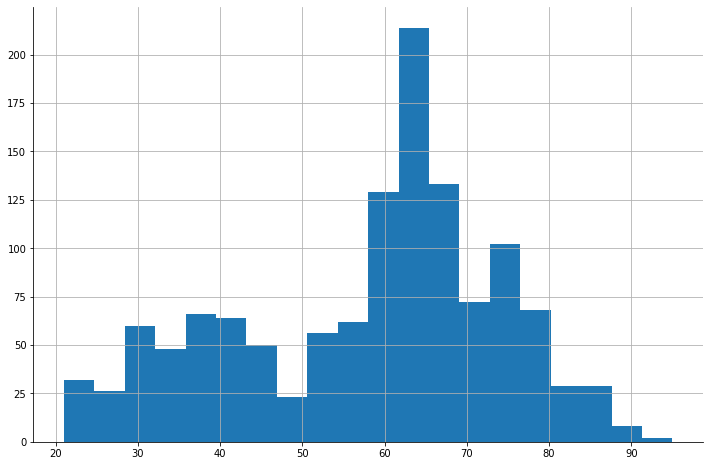

In [709]:
df_clean = df_clean.assign(age = 2021 - df_clean['birthyr'])
df_clean.loc[df_clean['vote'] == 'Donald Trump']['age'].hist(bins=20)
sns.despine();

Around 60-70 year old were Trump's largest voting age group.

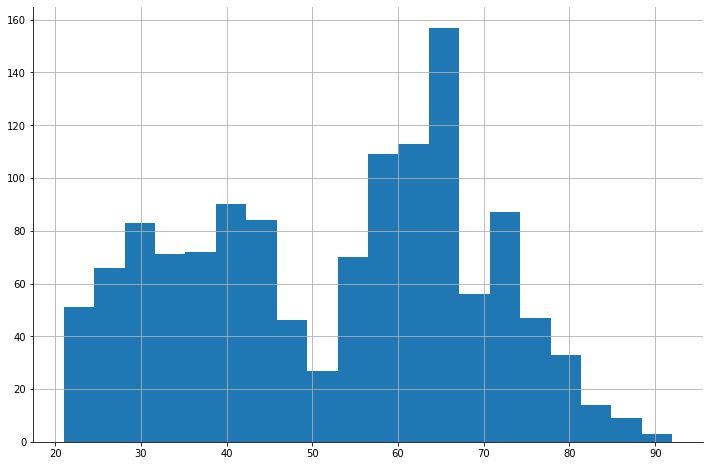

In [710]:
df_clean.loc[df_clean['vote'] == 'Joe Biden']['age'].hist(bins=20)
sns.despine();

There were more young people voted for Biden.

In [714]:
catcolumns = ['liveurban', 'vote16', 'protest', 'vote', 'confecon', 'ideology', 'partyID', 'universal_income', 
              'family_separation', 'free_college', 'forgive_loans', 'race', 'sex', 'education']
df_clean[catcolumns] = df_clean[catcolumns].astype('category')

## Economy

In [718]:
df_clean['worried_econ'] = df_clean['confecon'].apply(lambda x: x in 
                                                      ['Moderately worried', 'Very worried', 'Extremely worried'])
df_clean.loc[df_clean['vote'] == 'Joe Biden']['worried_econ'].value_counts(normalize=True)

True     0.713509
False    0.286491
Name: worried_econ, dtype: float64

Among Joe Biden's voters, over 71% worried about economy. 29% did not worry about economy.

In [720]:
df_clean.loc[df_clean['vote'] == 'Donald Trump']['worried_econ'].value_counts(normalize=True)

False    0.813826
True     0.186174
Name: worried_econ, dtype: float64

Among Trump's voters, only 19% worried about economy, and 81% did not worry about economy.

In [739]:
df_clean['confecon'] = df_clean['confecon'].cat.reorder_categories(['Not at all worried',
                                                                    'A little worried', 
                                                                    'Moderately worried',
                                                                    'Very worried',
                                                                    'Extremely worried'])
mybars = df_clean['confecon'].value_counts().sort_index()

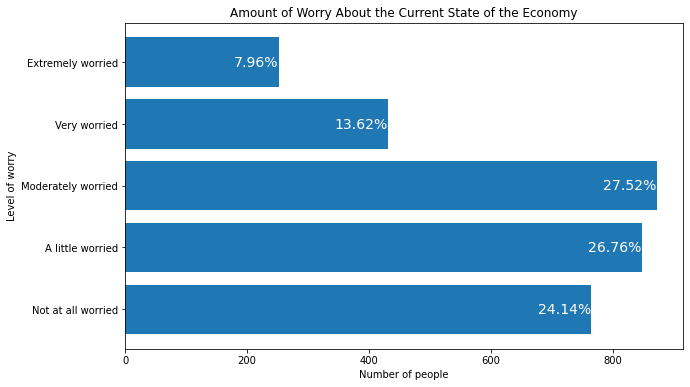

In [740]:
plt.figure(figsize=(10, 6))
myplot = plt.barh(mybars_df['index'], mybars_df['confecon'])
plt.ylabel('Level of worry')
plt.xlabel('Number of people')
plt.title('Amount of Worry About the Current State of the Economy')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(mybars_df['confecon']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%',
             horizontalalignment = 'right', 
             verticalalignment = 'center',
             fontsize = 14, color = 'white');

Most voters did not very worry about the state of the economy.

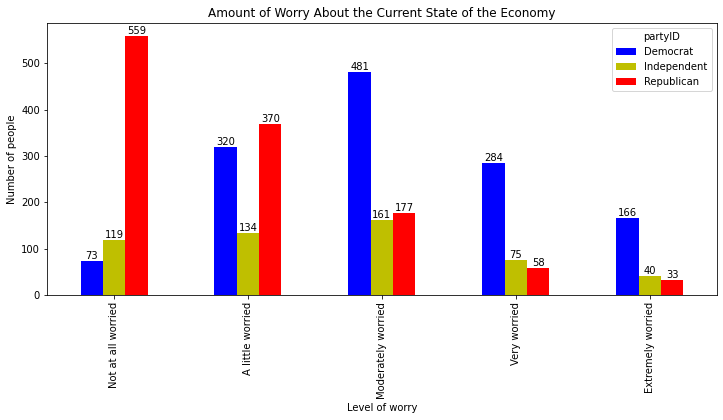

In [741]:
xtab = pd.crosstab(df_clean['confecon'], df_clean['partyID'])
myplot = xtab.plot(kind='bar', figsize=(12, 5), color=['b', 'y', 'r'])
plt.xlabel('Level of worry')
plt.ylabel('Number of people')
plt.title('Amount of Worry About the Current State of the Economy')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)),
             horizontalalignment = 'center',
             verticalalignment = 'bottom',
             fontsize=10);

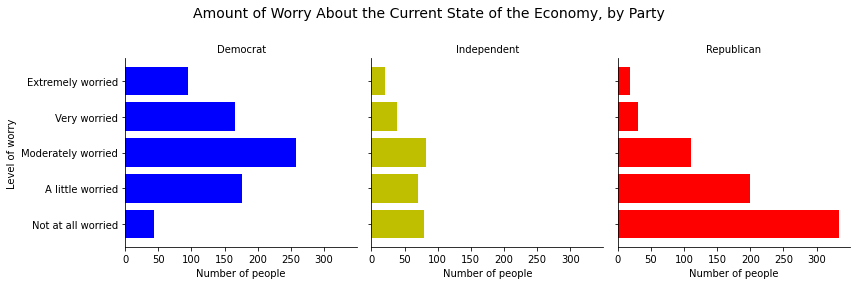

In [744]:
g = sns.FacetGrid(df_plot, col='partyID', hue='partyID',  hue_kws={'color': ['b', 'y', 'r']},
                  height=4, aspect=1)
g.map(plt.barh, 'confecon', 'count')
g.set_titles('{col_name}')
g.set_axis_labels('Number of people', 'Level of worry') 
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Amount of Worry About the Current State of the Economy, by Party', fontsize=14);

Republicans were least worry about the state of the economy.

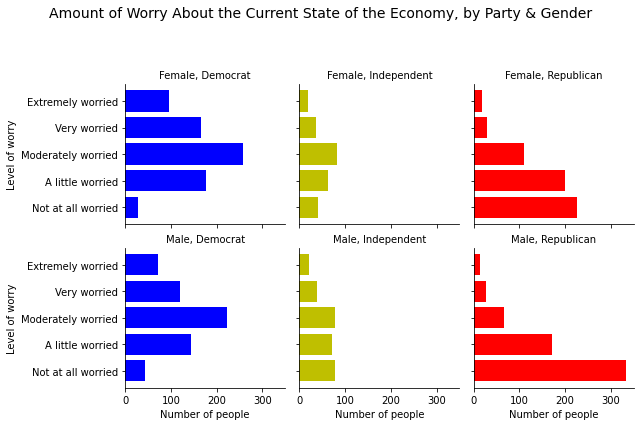

In [745]:
df_plot = df_clean.groupby(['partyID', 'sex', 'confecon']).size().reset_index()
df_plot = df_plot.rename(columns={0: 'count'})
g = sns.FacetGrid(df_plot, row='sex', col='partyID', hue_kws={'color': ['b', 'y', 'r']}, hue='partyID')
g.map(plt.barh, 'confecon', 'count')
g.set_titles('{row_name}, {col_name}')
g.set_axis_labels('Number of people', 'Level of worry')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Amount of Worry About the Current State of the Economy, by Party & Gender', fontsize=14);

This applies to both male and female.

/opt/tljh/user/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



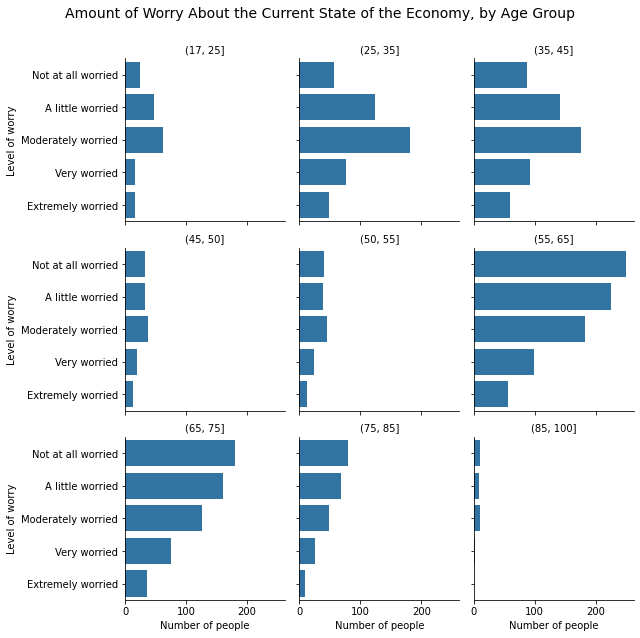

In [748]:
df_plot = df_clean
df_plot['age_cat'] = pd.cut(df_clean.age, [17,25,35,45,50,55,65,75,85,100])
df_plot = df_plot.groupby(['confecon','age_cat']).size().reset_index()
df_plot = df_plot.rename({0:'count'}, axis=1)

g = sns.FacetGrid(df_plot, col = 'age_cat', col_wrap=3, height=3, aspect=1)
g.map(sns.barplot, 'count', 'confecon')
g.set_titles('{col_name}')
g.set_axis_labels('Number of people', 'Level of worry') 
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Amount of Worry About the Current State of the Economy, by Age Group', fontsize=14);

## Universal basic income

In [749]:
df_clean.loc[df_clean['vote'] == 'Donald Trump'].stb.freq(['universal_income'])

,universal_income,count,percent,cumulative_count,cumulative_percent
0,Oppse a great deal,820,64.414768,820,64.414768
1,Neither favor nor oppose,135,10.604870,955,75.019639
2,Oppose a moderate amount,85,6.677141,1040,81.696779
3,Favor a little,72,5.655931,1112,87.352710
4,Favor a great deal,60,4.713276,1172,92.065986
5,Favor a moderate amount,55,4.320503,1227,96.386489
6,oppose a little,46,3.613511,1273,100.000000


Trump's voters tend to strongly oppose universal basic income.

In [750]:
df_clean.loc[df_clean['vote'] == 'Joe Biden'].stb.freq(['universal_income'])

,universal_income,count,percent,cumulative_count,cumulative_percent
0,Neither favor nor oppose,333,25.854037,333,25.854037
1,Favor a great deal,239,18.555901,572,44.409938
2,Favor a moderate amount,212,16.459627,784,60.869565
3,Favor a little,199,15.450311,983,76.319876
4,Oppse a great deal,106,8.229814,1089,84.549689
5,oppose a little,105,8.152174,1194,92.701863
6,Oppose a moderate amount,94,7.298137,1288,100.000000


Biden's voters tend to not oppose universal basic income.

## Universal basic income vs. political ideology

In [751]:
df_clean['universal_income'] = df_clean['universal_income'].cat.reorder_categories(['Oppse a great deal', 'Oppose a moderate amount', 
                                                                                    'oppose a little', 'Neither favor nor oppose',
                                                                                    'Favor a little', 'Favor a moderate amount', 
                                                                                    'Favor a great deal'])
df_clean['ideology'] = df_clean['ideology'].cat.reorder_categories(['Liberal', 'Moderate', 'Conservative'])

(pd.crosstab(df_clean['universal_income'], df_clean['ideology'], normalize='columns')*100).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppse a great deal,6.71,23.62,62.19
Oppose a moderate amount,5.61,7.87,7.11
oppose a little,6.71,8.20,3.99
Neither favor nor oppose,22.07,26.00,11.71
Favor a little,15.73,12.30,6.24
Favor a moderate amount,18.78,11.00,3.99
Favor a great deal,24.39,11.00,4.77


Conservative tend to strongly oppose universal basic income, and Liberal tend to not oppose universal basic income.

## Universal basic income and free college

In [723]:
df_clean['favor_both'] = df_clean.apply(lambda x: 
                                        x['universal_income'] in ['Favor a great deal', 
                                                                  'Favor a little', 'Favor a moderate amount'] 
                                        and x['free_college'] in ['Favor a great deal', 
                                                                  'Favor a moderate amount', 'Favor a little'], axis=1)
df_clean.loc[df_clean['vote'] == 'Joe Biden']['favor_both'].value_counts(normalize=True)

False    0.610248
True     0.389752
Name: favor_both, dtype: float64

Among Biden's voters, 39% favor both universal basic income and free college.

In [724]:
df_clean.loc[df_clean['vote'] == 'Donald Trump']['favor_both'].value_counts(normalize=True)

False    0.924588
True     0.075412
Name: favor_both, dtype: float64

Among Trump's voters, only 7.5% favor both universal basic income and free college.

## Journalists & Immigration

In [726]:
df_clean.groupby('vote').agg({'fttrump': 'mean',
                             'ftbiden': 'mean',
                             'ftimmig': 'mean',
                             'ftjournal': 'mean'})

,fttrump,ftbiden,ftimmig,ftjournal
vote,,,,
Donald Trump,87.835303,15.743286,68.801887,26.502749
Joe Biden,8.450549,70.724649,75.315217,72.365683
Probably will not vote,28.750000,39.595238,61.734043,49.706714
Someone else,23.126582,34.022293,67.503125,52.386293


Voters who favor Trump had the lowest favorability on journalists. Voters who favor Biden had the highest favorability on immigration.

## Urban vs. Rural

In [731]:
pd.DataFrame(df_clean.groupby(['vote', 'liveurban']).size().unstack())

liveurban,City,Rural,Suburb,Town
vote,,,,
Donald Trump,235,314,465,259
Joe Biden,401,204,462,221
Probably will not vote,88,61,83,51
Someone else,92,64,107,58


Biden had more voters than Trump in cities, and Trump had more voters in rural areas. Trump had a slight lead among people in towns, and Trump and Biden were within three votes among people in suburbs.

## Important Issue

In [732]:
df_clean.groupby('vote').most_important_issue.apply(lambda x: 
                                                    x.str.contains('trump', case=False).sum()).sort_values(ascending=False)

vote
Joe Biden                 325
Donald Trump               59
Someone else               25
Probably will not vote     10
Name: most_important_issue, dtype: int64

Biden's voters mentioned "Trump" 325 times when talking about the most important issue, while Trump's voters only mentioned "Trump" 59 times.

## Thermometer rating for the candidates

In [758]:
df_clean[['ftbiden', 'fttrump']].corr()

,ftbiden,fttrump
ftbiden,1.000000,-0.646357
fttrump,-0.646357,1.000000


The correlation between Biden and Trump’s thermometer ratings is negative, which is not surprising.

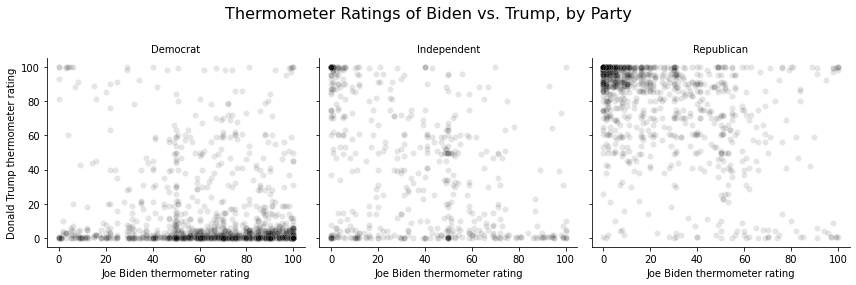

In [752]:
g = sns.FacetGrid(df_clean, col = 'partyID', height=4, aspect=1)
g.map(sns.scatterplot, 'ftbiden', 'fttrump', alpha=.1, color='black')
g.set_titles('{col_name}')
g.set_axis_labels('Joe Biden thermometer rating', 'Donald Trump thermometer rating') 
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Thermometer Ratings of Biden vs. Trump, by Party', fontsize=16);

Democrats were mostly united in rating Trump very low, but they had a wide range of mixed feelings towards Biden. Republicans in contrast were more clustered around higher ratings for Trump. Independents were spread out and were more common in the middle.

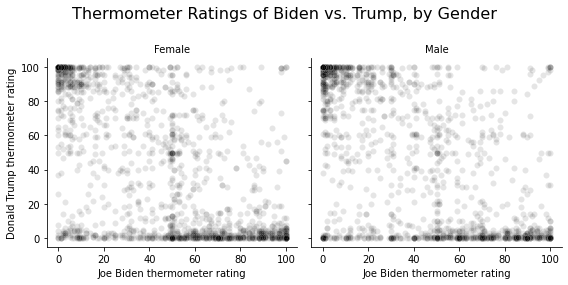

In [754]:
g = sns.FacetGrid(df_clean, col = 'sex', height=4, aspect=1)
g.map(sns.scatterplot, 'ftbiden', 'fttrump', alpha=.1, color='black')
g.set_titles('{col_name}')
g.set_axis_labels('Joe Biden thermometer rating', 'Donald Trump thermometer rating') 
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Thermometer Ratings of Biden vs. Trump, by Gender', fontsize=16);

There isn't obvious difference between how male vs. female rated on both candidates.

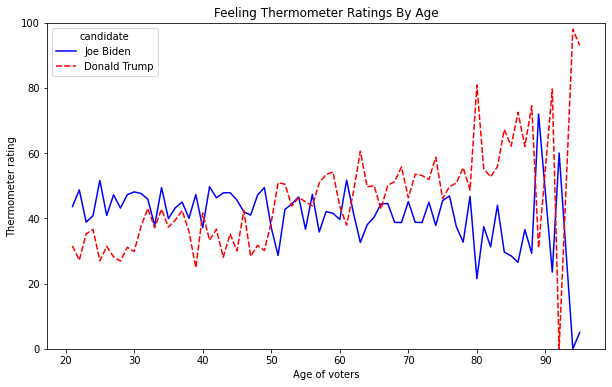

In [755]:
df_line = df_clean.groupby('age').agg({'ftbiden':'mean',
                                       'fttrump':'mean',
                                       'ftobama':'mean',
                                       'ftsanders':'mean'})
df_line = df_line.reset_index()
df_line = pd.melt(df_line, id_vars='age', 
                    value_vars = ['ftbiden', 'fttrump', 'ftobama', 'ftsanders'])
df_line = df_line.rename({'variable':'candidate', 'value':'thermometer'}, axis=1)
df_line['candidate'] = df_line['candidate'].map({'ftbiden':'Joe Biden',
                                                 'fttrump':'Donald Trump',
                                                 'ftobama':'Barack Obama',
                                                 'ftsanders':'Bernie Sanders'})

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='thermometer', hue='candidate', palette=['blue','red'], style='candidate',
             data=df_line.query("candidate=='Donald Trump' | candidate=='Joe Biden'"))
plt.xlabel('Age of voters')
plt.ylabel('Thermometer rating')
plt.title('Feeling Thermometer Ratings By Age')
plt.ylim(0,100);

Apparently, Biden was more popular among younger voters and Trump was more popular among older voters.

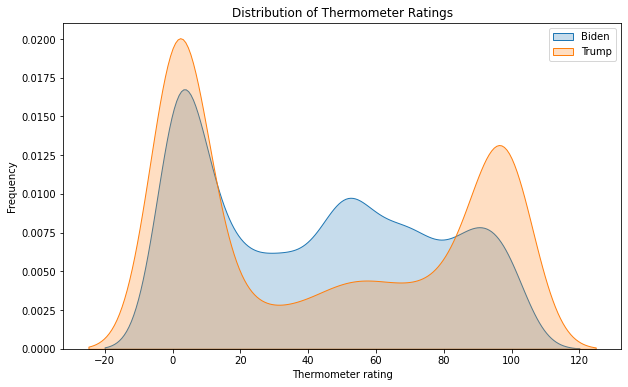

In [756]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_clean.ftbiden, shade=True, label='Biden')
sns.kdeplot(df_clean.fttrump, shade=True, label='Trump')
plt.ylabel('Frequency')
plt.xlabel('Thermometer rating')
plt.title('Distribution of Thermometer Ratings')
plt.legend();

More people had extreme opinions of Trump, and more people had mediocre opinions of Biden.

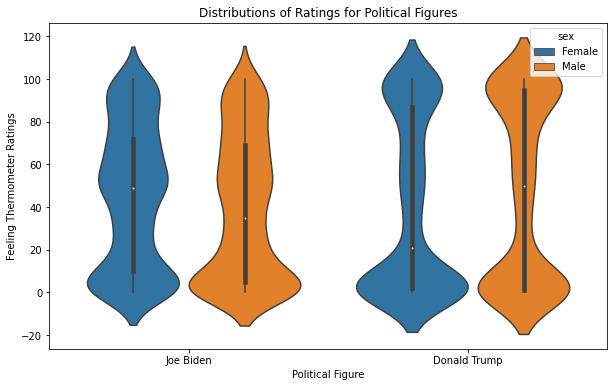

In [757]:
df_vio = pd.melt(df_clean, id_vars = ['caseid', 'sex'], 
                    value_vars = ['ftbiden', 'fttrump'])
df_vio = df_vio.rename(columns=({'variable':'candidate',
                        'value':'thermometer'}))
df_vio['candidate'] = df_vio['candidate'].map({'ftbiden':'Joe Biden',
                                                'fttrump':'Donald Trump'})
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'candidate', y = 'thermometer', data = df_vio,
              hue = 'sex')
plt.xlabel("Political Figure")
plt.ylabel("Feeling Thermometer Ratings")
plt.title("Distributions of Ratings for Political Figures");

And this applies to both male and female voters.

## Statistical Analysis

### Weighted average of candidates’ thermometer ratings

We can recalculate the average Biden rating & average Trump rating while using these weights to count every row in a way that is more representative of the U.S. adult population.

In [759]:
df_clean.weight = pd.to_numeric(df_clean.weight.str.strip().replace({'':1}))
biden_temp = df_clean.loc[~df_clean.ftbiden.isna()]
np.average(biden_temp.ftbiden, weights = biden_temp.weight)

43.31193635270897

In [760]:
trump_temp = df_clean.loc[~df_clean.fttrump.isna()]
np.average(trump_temp.fttrump, weights = trump_temp.weight)

43.25284206257595

The weighted average of Biden’s thermometer ratings is similar with Trump's.

### Weighted median of candidates' thermometer ratings

In [761]:
import weighted

weighted.median(df_clean['ftbiden'], df_clean.weight)

47.0

In [762]:
weighted.median(df_clean['fttrump'], df_clean.weight)

37.0

However, the weighted median of Biden’s thermometer ratings is much higher (10 points) than Trump's.

### Measures of variability

In [765]:
[df_clean.ftbiden.var(), df_clean.ftbiden.std()]

[1118.0106501193227, 33.436666253071984]

Variability and standard deviation

In [766]:
[df_clean.ftbiden.min(), df_clean.ftbiden.max()]

[0.0, 100.0]

Min and Max

In [763]:
[df_clean['ftbiden'].quantile(.75), 
df_clean['ftbiden'].quantile(.25),
df_clean['ftbiden'].quantile(.75) - df_clean['ftbiden'].quantile(.25)]

[70.0, 7.0, 63.0]

Biden's thermometer ratings at 75th and 25th percentiles, and interquartile range (IQR).

In [764]:
[df_clean['fttrump'].quantile(.75),
df_clean['fttrump'].quantile(.25),
df_clean['fttrump'].quantile(.75) - df_clean['fttrump'].quantile(.25)]

[91.0, 2.0, 89.0]

Trump's thermometer ratings at 75th and 25th percentiles, and interquartile range (IQR).

## Mean, median & quantile

In [779]:
def q25(x):
    return x.quantile(.25)

def q75(x):
    return x.quantile(.75)

df_clean.groupby('partyID').agg({'ftbiden': ['mean', 'median', q25, q75],
                                 'fttrump': ['mean', 'median', q25, q75]}).round(2)

ftbiden                    fttrump                     
               mean median   q25   q75    mean median    q25    q75
partyID                                                            
Democrat      66.38   70.0  50.0  88.0   11.21    2.0   0.00    7.0
Independent   35.26   33.0   6.0  53.0   40.89   37.0   2.50   73.5
Republican    18.82    8.0   1.0  31.0   82.36   94.0  74.75  100.0

There is a clear relationship between party affiliation and candidates' thermometer ratings.

In [781]:
df_clean['partisanship'] = df_clean['ftbiden'] - df_clean['fttrump']
df_clean[['ftbiden', 'fttrump', 'partisanship']]
(pd.crosstab(df_clean['liveurban'], df_clean['ideology'], values=df_clean['partisanship'], aggfunc='mean')).round(2)

ideology,Liberal,Moderate,Conservative
liveurban,,,
City,56.66,21.66,-45.38
Rural,46.16,6.45,-64.23
Suburb,55.42,21.39,-63.63
Town,52.12,19.71,-63.97


People who live in cities and are liberal rated Biden 56.66 points higher than Trump on average, and people who are conservative and live in suburbs rated Trump 63.63 points higher than Biden on average.

### Hypothesis tests

For example, we want to know where there is significant difference between men and women on how they rate Trump.

In [782]:
fttrump_men = df_clean.query("sex=='Male'").fttrump.dropna()
fttrump_women = df_clean.query("sex=='Female'").fttrump.dropna()
stats.ttest_ind(fttrump_men, fttrump_women, equal_var=False)

Ttest_indResult(statistic=5.22707643132577, pvalue=1.8362222726982473e-07)

We can reject the null hypothesis and conclude that there is a statisitically significant difference between men and women in terms of how highly they rate Trump.

We also want to compare the average rating of Trump to the average rating of Biden.

In [783]:
{'trump': df_clean['fttrump'].mean(),
 'biden': df_clean['ftbiden'].mean(), 
 'difference': df_clean['fttrump'].mean() - df_clean['ftbiden'].mean()}

{'trump': 43.87000958160332,
 'biden': 42.15189466923571,
 'difference': 1.7181149123676107}

In [784]:
df_ttest = df_clean[['fttrump', 'ftbiden']].dropna()
stats.ttest_rel(df_ttest['fttrump'], df_ttest['ftbiden'])

Ttest_relResult(statistic=1.6327284676310017, pvalue=0.10262803725374475)

We fail to reject the null hypothesis that the two candidates have the same average thermometer rating.

### Test of multiple comparisons

We want to know whether there is a significant difference between the average age of Democrats, independents, and Republicans:

In [786]:
df_clean.groupby('partyID').agg({'age': 'mean'})

,age
partyID,
Democrat,51.734894
Independent,49.705104
Republican,57.350877


In [787]:
stats.f_oneway(df_clean.query("partyID == 'Democrat'").age.dropna(),
               df_clean.query("partyID == 'Independent'").age.dropna(),
               df_clean.query("partyID == 'Republican'").age.dropna())

F_onewayResult(statistic=52.588970634465824, pvalue=3.517577203359592e-23)

The p-value is much smaller than .05, so we reject the null hypothesis that the three groups have the same average age.

### Tests of association

Conservatives overwhelmingly oppose a universal basic income, with 62.2% of conservatives stating that they oppose a universal basic income a great deal. Only 6.7% of liberals, in contrast, oppose a universal basic income a great deal.

Whether these differences are strong enough for us to conclude that there are ideological differences in support for a universal basic income.

In [788]:
(pd.crosstab(df_clean['universal_income'], df_clean['ideology'], normalize='columns')*100).round(2)

ideology,Liberal,Moderate,Conservative
universal_income,,,
Oppse a great deal,6.71,23.62,62.19
Oppose a moderate amount,5.61,7.87,7.11
oppose a little,6.71,8.20,3.99
Neither favor nor oppose,22.07,26.00,11.71
Favor a little,15.73,12.30,6.24
Favor a moderate amount,18.78,11.00,3.99
Favor a great deal,24.39,11.00,4.77


In [789]:
stats.chi2_contingency(pd.crosstab(df_clean['universal_income'], df_clean['ideology']).values)

(849.5464372904162,
 3.8910750579483107e-174,
 12,
 array([[280.2137931 , 316.77827586, 394.00793103],
        [ 56.83448276,  64.25068966,  79.91482759],
        [ 50.04827586,  56.57896552,  70.37275862],
        [157.49655172, 178.04793103, 221.45551724],
        [ 89.06896552, 100.69137931, 125.23965517],
        [ 85.39310345,  96.53586207, 120.07103448],
        [100.94482759, 114.11689655, 141.93827586]]))

The p-value at 3.89e-174 is much less than .05. Therefore, we reject this null hypothesis and conclude that there is a statistically significant relationship between ideology and support for a universal basic income.

### Multidimensional Scaling

In [790]:
from sklearn.metrics import euclidean_distances

df_ft = df_clean.loc[:, 'fttrump': 'ftimmig'].dropna()
names = df_ft.columns.str[2:]
ft_distance = euclidean_distances(np.transpose(df_ft))

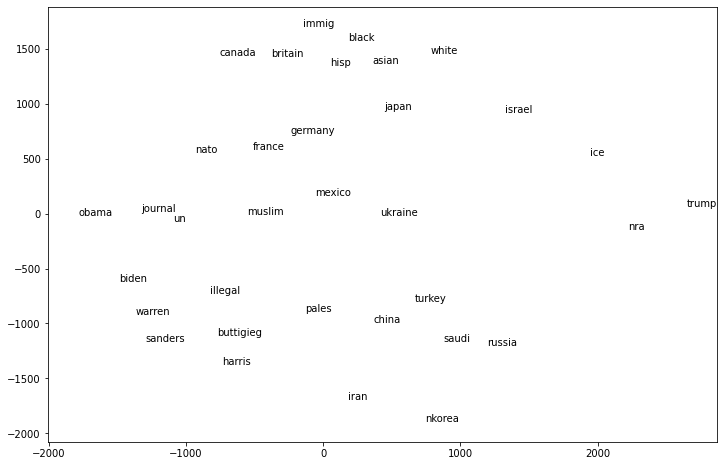

In [791]:
from sklearn import manifold

mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
mds_fit = mds.fit(ft_distance)
pos = mds_fit.embedding_

plt.rcParams['figure.figsize'] = 12,8
plt.scatter(pos[:, 0], pos[:, 1], color='navy', s=0)

for i in enumerate(names):
    plt.annotate(i[1], (pos[i[0], 0], pos[i[0], 1]))
plt.show();

The above graph represents a map of politics according to a representative sample of adults in the data in the United States as of December 2019. Entities that are closer together have smaller Euclidean distances, which indicates that they are similar in some ways. 

Democratic candidates for president, Biden, Sanders, Warren, Buttigieg, and Harris are all very close together. Obama is also close to that cluster of Democrats. Trump is about as far from them as possible. Trump is closest to the NRA and ICE, The Democrats are close to the UN, the NATO, journalists, and illegal immigrants. The racial groups, white, black, Asian, and Hispanic are close to each other and to immigrants. Among countries, there are two main groupings: one includes Canada, France, Britain, Germany, France, and Mexico, and the other includes China, Turkey, Iran, Saudi Arabia, Russia, and North Korea. Israel and Palestine are more distant from other countries and very far from each other. Ukraine is in the middle.

This graph helps us understand similarities between features, helps us understand the viewpoints towards different topics in the American electorate.

### Principal Component Analysis (PCA)

In [792]:
from prince import PCA

pca = PCA(n_components=2, 
          rescale_with_mean=True,
          rescale_with_std=True
)
pca = pca.fit(df_ft)

In [793]:
loadings = pca.column_correlations(df_ft)
loadings.columns = ['dim1', 'dim2']
loadings.sort_values('dim1')

,dim1,dim2
ftjournal,-0.830682,0.225883
ftun,-0.817509,0.169747
ftillegal,-0.811237,0.137007
ftobama,-0.804786,0.376682
ftwarren,-0.804091,0.360561
ftharris,-0.774592,0.292580
ftmuslim,-0.769883,-0.099410
ftbiden,-0.752664,0.319838
ftbuttigieg,-0.750555,0.254972
ftsanders,-0.746146,0.355578


The first feature (dim1) seems to represent the traditional left-right ideological spectrum. The Democrats, along with the U.N., illegal immigrants, and journalists load most strongly on one side of this index, and Trump, the NRA, and ICE load most strongly on the other side.

In [347]:
loadings.sort_values('dim2')

,dim1,dim2
ftisrael,0.124992,-0.695920
ftice,0.478175,-0.632289
ftnra,0.550674,-0.613404
ftwhite,-0.104892,-0.582802
ftasian,-0.410437,-0.565740
fttrump,0.685936,-0.561953
ftjapan,-0.415978,-0.542368
ftrussia,-0.071980,-0.494301
ftbritain,-0.429749,-0.493660
fthisp,-0.495543,-0.480104


The secone feature(dim2) seems associated with left-right political ideology as well, but it appears to partly identify the countries.

### Multiple Correspondence Analysis (MCA)

Similar to PCA, but MCA works with categorical observed features instead of continuous-valued ones. Like multidimensional scaling, MCA can be used to generate a map that is an excellent tool for EDA. In this case, the map will show would closely categories of different features correspond to one another.

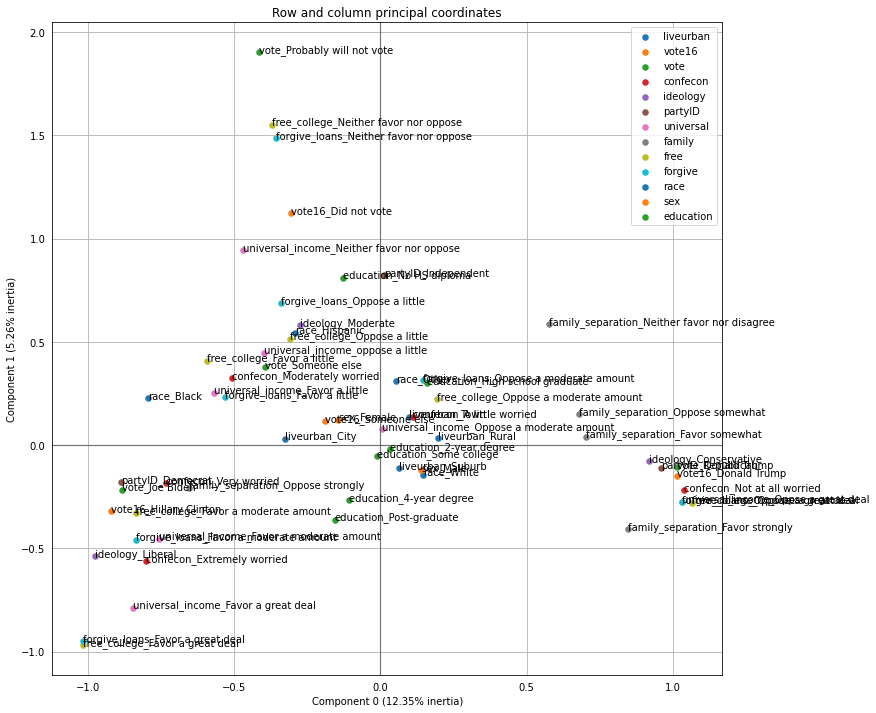

In [794]:
from prince import MCA

df_cat = df_clean[['liveurban', 'vote16', 'vote', 'confecon', 'ideology', 'partyID', 
                   'universal_income', 'family_separation', 'free_college', 
                   'forgive_loans', 'race', 'sex', 'education']].dropna()
mca = MCA(n_components=2)
mca = mca.fit(df_cat)

mca.plot_coordinates(X=df_cat, 
                     figsize=(12, 12), 
                     show_row_points=False, 
                     row_points_size=10, 
                     show_row_labels=False, 
                     show_column_points=True,
                     column_points_size=30,
                     show_column_labels=True,
                     legend_n_cols=1);

In [795]:
mca.column_coordinates(df_cat).sort_values(0)

,0,1
forgive_loans_Favor a great deal,-1.016875,-0.948425
free_college_Favor a great deal,-1.014847,-0.968513
ideology_Liberal,-0.976584,-0.538839
vote16_Hillary Clinton,-0.920940,-0.321139
partyID_Democrat,-0.886805,-0.179322
...,...,...
vote16_Donald Trump,1.015532,-0.148591
universal_income_Oppse a great deal,1.030309,-0.274405
forgive_loans_Oppose a great deal,1.031305,-0.277152
confecon_Not at all worried,1.038713,-0.219533


The first latent feature we have categories is for liberal ideology, voting for Hillary Clinton in 2016, identifying as a Democrat, and supporting free college and educational loan forgiveness a great deal. On the other end we have categories for voting for Trump in 2016, no worry about the economy, and a great deal of opposition to free college, loan forgiveness, and universal basic income. This first latent feature appears to be the left-right ideological dimension.

In [796]:
mca.column_coordinates(df_cat).sort_values(1)

,0,1
free_college_Favor a great deal,-1.014847,-0.968513
forgive_loans_Favor a great deal,-1.016875,-0.948425
universal_income_Favor a great deal,-0.844009,-0.786407
confecon_Extremely worried,-0.801452,-0.561779
ideology_Liberal,-0.976584,-0.538839
...,...,...
universal_income_Neither favor nor oppose,-0.468033,0.943663
vote16_Did not vote,-0.305585,1.122188
forgive_loans_Neither favor nor oppose,-0.357096,1.485270
free_college_Neither favor nor oppose,-0.369833,1.552549


On one end, we have positions that do not take a position: did not vote in 2016, probably will not vote in 2020, and neither favor nor oppose universal basic income, loan forgiveness, and free college. This appears to measure voter apathy.

# The end